#Week HW1 by Dmitriev Egor
[Link to watch online](https://colab.research.google.com/drive/1sgjQd-rN5dqcMwDLk7prgB0ev2w3hXHx#scrollTo=5tjBCMv5mx3T&uniqifier=4)

## Task 1

###Given:

$$
\begin{cases}
x = 3t\\
y = 4t^2+1
\end{cases}
$$

###Find:

$$
y(x),\ 
\vec v,\ 
\vec a,\ 
\vec a_n,\ 
\vec a_\tau,\ 
k\\
\text{for }t \in [-5\dots5]
$$

### Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set the timeframe
t0 = -5
t1 = 5
dt = 0.04 #25 fps
# dt = 0.2 #5 fps

T = np.arange(t0, t1, dt) # generate an array of timestamps

#### Position
* $x = 3t$
* $y = 4t^2+1$

$$
t = \frac{x}{3}\\
\underline{y(x)= \frac{4x^2}{9}+1}
$$

In [ ]:
# parametric equation of particle's movement
def x(t):
  return 3*t

def y(t):
  return 4*(t**2)+1
  
P = np.array([list(map(x, T)), list(map(y, T))])
#print(P)

#### Velocity
* $v_x = \frac{dx}{dt} = \dot x$
* $v_y = \frac{dy}{dt} = \dot y$

$$
\underline{
\vec v = 
\begin{bmatrix}
\dot x\\
\dot y
\end{bmatrix}
=
\begin{bmatrix}
3\\
8t
\end{bmatrix}
}
$$

In [ ]:
V = np.array([np.gradient(P[0], T), np.gradient(P[1],T)])
#print(V)

#### Acceleration
* $a_x = \frac{dv_x}{dt} = \dot v_x = \ddot x$
* $a_y = \frac{dv_y}{dt} = \dot v_y  = \ddot y$

$$
\underline{
\vec a = 
\vec v^\prime
=
\begin{bmatrix}
0\\
8
\end{bmatrix}
}
$$

In [ ]:
A = np.array([np.gradient(V[0], T), np.gradient(V[1], T)])
#print(A)

#### Normal and tangential accelerations

To get $\vec a_n$ we need to project $\vec a$ on $\vec v$
$$\underline{a_n = \frac{\vec a * \vec v}{|v|}}$$ 
$\vec a_\tau + \vec a_n = \vec a$

Therefore, $\underline{\vec a_\tau = \vec a - \vec a_n}$ 

In [ ]:
def project(u, v):
  ret = np.dot(u, v)*v/np.dot(v, v)
  return ret

An = np.transpose(list(map(project, np.transpose(A), np.transpose(V))))
At = np.array(A) - An

#### Osculating circle
$$\underline{|r| = \left|\frac{ds}{d\phi}\right| = \left|\frac{(\dot x^2 + \dot y^2)^\frac{3}{2}}{\dot x \ddot y - \dot y \ddot x}\right|}
\\
\underline{
k = \frac{1}{|r|}}
$$

Let $\vec r$ be the shift from the point to the center of Osculation circle. Then
$\vec r = \frac{\vec a_\tau}{|\vec a_\tau|}*|r|$

In [ ]:
R = (At/np.linalg.norm(At)) * np.abs(((V[0]**2+V[1]**2)**(3/2))/(V[0]*A[1]-V[1]*A[0]))
# print(R)

#### Plot the graphs

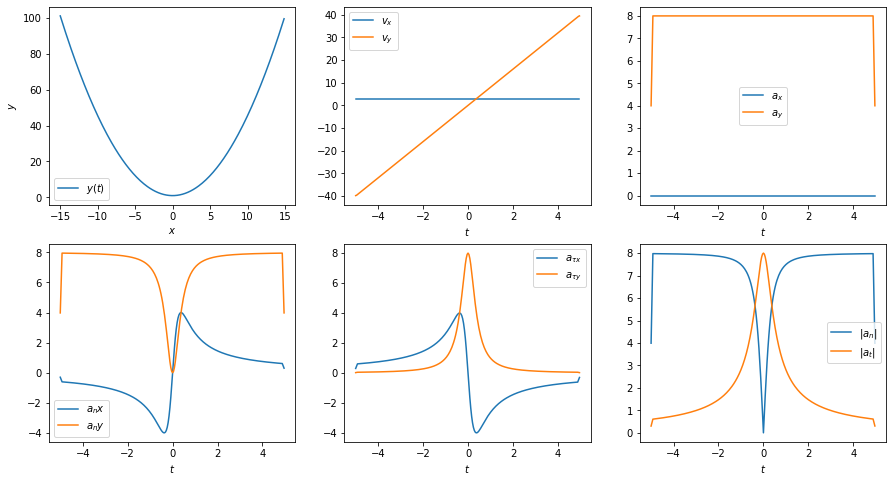

In [ ]:
#Create 2-by-3 grid
fig, [[ax1,ax2,ax3], [ax4,ax5,ax6]] = plt.subplots(2, 3, figsize=(15,8))

ax1.plot(P[0], P[1], label=r'$y(t)$')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.legend()

ax2.plot(T, V[0], label=r'$v_x$')
ax2.plot(T, V[1], label=r'$v_y$')
ax2.set_xlabel(r'$t$')
ax2.legend()

ax3.plot(T, A[0], label=r'$a_x$')
ax3.plot(T, A[1], label=r'$a_y$')
ax3.set_xlabel(r'$t$')
ax3.legend()


ax4.plot(T, An[0], label=r'$a_nx$')
ax4.plot(T, An[1], label=r'$a_ny$')
ax4.set_xlabel(r'$t$')
ax4.legend()

ax5.plot(T, At[0], label=r'$a_{\tau x}$')
ax5.plot(T, At[1], label=r'$a_{\tau y}$')
ax5.set_xlabel(r'$t$')
ax5.legend()

ax6.plot(T, np.sqrt(An[0]**2 + An[1]**2), label=r'$|a_n|$')
ax6.plot(T, np.sqrt(At[0]**2 + At[1]**2), label=r'$|a_t|$')
ax6.set_xlabel(r'$t$')
ax6.legend()

### Plot animation

#### Lots of code

In [ ]:
vs = 40 # edges of 'Verctors' subplot 

In [ ]:
# Gateher all the moving vectors and plug them into given plots ax1 (dynamic), ax2 (static)
class draw_vec:
  def __init__(self, labels, parent, vectors, col=None, lw1=None, lw2=None, scale=None, ax1=ax1, ax2=ax2, scale1 = 1):
    self.n = len(vectors)
    self.parent = {'x': parent[0], 'y':parent[1]}
    self.vectors = {'x': vectors[:, 0], 'y':vectors[:, 1]}
    #scale = 1/scale - makes 
    self.q1 = ax1.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw1, visible=False,
                         scale=1/scale/scale1, angles='xy', scale_units='xy', zorder = 10)
    self.q2 = ax2.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw2, visible=False,
                         scale=1/scale, angles='xy', scale_units='xy', zorder = 10)
    
    custom_lines = [Line2D([0], [0], color=i, lw=4) for i in col]
    fig.legend(custom_lines, labels)

  def draw(self, n, show = True):
    self.q1.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q2.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q1.set_offsets([self.parent['x'][n], self.parent['y'][n]])
    self.q1.set_visible(show)
    self.q2.set_visible(show)

  def getVectors(self):
    return([self.q1, self.q2])

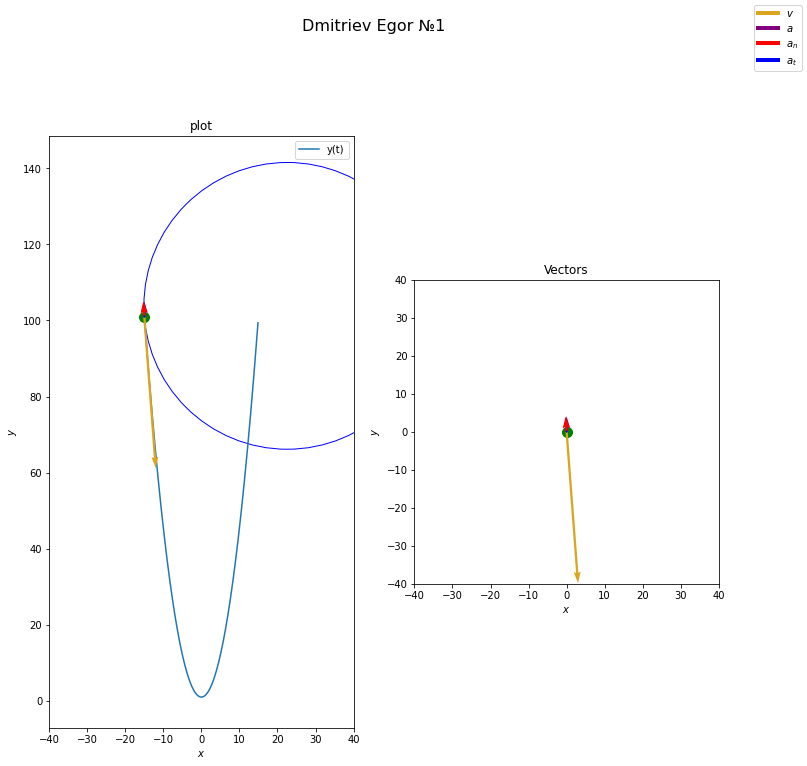

In [ ]:
from matplotlib import animation
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline

# setup the plot
fig = plt.figure(figsize=(12,12))
fig.suptitle("Dmitriev Egor №1", fontsize=16)
ax1 = plt.subplot(1,2,1, aspect='equal') 
ax2 = plt.subplot(1,2,2, aspect='equal') 

# setup subplot 1
ax1.plot(*P, label='y(t)') #unpack P to P[0], P[1] using *P
ax1.set_xlim((-40, 40))
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.legend()

txt_title = ax1.set_title('plot')
point,    = ax1.plot(P[0][0], P[1][0], 'g.', ms=20)

# setup subplot 2
ax2.set_xlim((-vs, vs))
ax2.set_ylim((-vs, vs))
ax2.plot(0, 0, 'g.', ms=20)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Vectors')

# initialize vectors

#draw vectors for point p
p = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], P, np.array([V, A, An, At]),
             ['goldenrod', 'purple', 'red', 'blue'], scale = 1, ax1=ax1, ax2=ax2)
p.draw(0, show=True)


oc = patches.Circle(P[:,0]+R[:,0], radius = np.linalg.norm(R[:,0]), transform=ax1.transData, facecolor='none', edgecolor='blue') 
ax1.add_patch(oc)

def drawframe(n):
  point.set_data(P[0][n], P[1][n])
  p.draw(n, show=True)
  oc.set(center=P[:,n]+R[:,n], radius=np.linalg.norm(R[:,n]))

  txt_title.set_text('Frame = {0:4d}'.format(n))
  return(*p.getVectors(), oc, ) # return parts that have changed to redraw them only

#### Beautiful animation

In [ ]:
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(T), interval=10000/len(T), blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

$V_n$ and $V_\tau$ are not perpendicular on the 1st subplot because of the  difference in relative scale between $OX$ and $OY$

## Task 2

### Given:

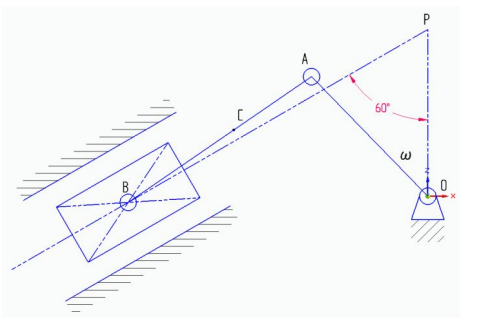

$$
\omega_{OA} = 1\ rad/s;\\
ε_{OA} = 0;\\
OA = OP = 25;\\
AB = 80;\\
AC = 20;\\
\text{initial }\angle OAB = 60°.
$$

### Find:

* Positions of $A, B, C$
* $v_B, v_C$
* $a_B, a_C$
* Plot all of the above

### Solution:

In [ ]:
# set the timeframe
t0 = 0
t1 = np.pi*2 #Pi*2 to make looped animation
dt = 0.04 #25 fps

T = np.arange(t0, t1, dt) # generate an array of timestamps

OA = 25
AB = 80
AC = 20

#### Movement of $A$
* $\underline{A_x = OA*cos(ε + \omega t) = OA*cos(t)}$
* $\underline{A_y = OA*sin(ε + \omega t) = OA*sin(t)}$

In [ ]:
# parametric equation of particle's movement
def x(t):
  return OA * np.cos(t)

def y(t):
  return OA * np.sin(t)
  
A = np.array([list(map(x, T)), list(map(y, T))])
# print(A)


#### Movement of B
When $OA$ is upright $\angle OAB = 60°$ and $AB$ is aligned with the movement of $B$

Using thq euation of a line on a plane $y=kx+b$ and known point $P=\{0, 25\}$ obtain:$
\begin{cases}
B_y = cot(60°)*B_x + b\\
25 = cot(60°)*0 + b
\end{cases}
$
$
\begin{cases}
B_y = \frac{B_x}{\sqrt 3}+OA\\
b = OA
\end{cases}
$
Knowing that $AB = 25$ and that $B$ is constrained to the line we can find $B$'s coordinates

$$
\begin{cases}
(A_x-B_x)^2 + (A_y-B_y)^2 = AB^2\\
B_y = \frac{B_x}{\sqrt 3}+OA
\end{cases}
\\
(A_x-B_x)^2 + (A_y-\frac{B_x}{\sqrt 3}-OA)^2 = AB^2
\\
(A_x^2-2A_xB_x+B_x^2)+(A_y^2 + \frac{B_x^2}{3} + OA^2 - \frac{2B_xA_y}{\sqrt 3} + \frac{2*OA*B_x}{\sqrt 3} - 2*OA*A_y) = AB^2
\\
-2A_xB_x + B_x^2 + \frac{B_x^2}{3} - \frac{2B_xA_y}{\sqrt 3} + \frac{2*OA*B_x}{\sqrt 3} = AB^2 - OA^2 - A_x^2 + 2*OA*A_y - A_y^2
\\
(\frac{2*OA}{\sqrt 3} - 2A_x - \frac{2A_y}{\sqrt 3})B_x + (1 + \frac{1}{3})B_x^2 +  = AB^2 - OA^2 - A_x^2 + 2*OA*A_y - A_y^2
\\
\underline{B_X=\frac{1}{4}\left( 
\sqrt{3}OA + 3A_x + \sqrt{3}A_y \pm \sqrt{-9OA^2 - 6\sqrt{3}OA*A_x + 18OA * A_y - 3A_x^2+6\sqrt{3}A_xA_y-9A_y^2+12AB^2} 
\right)}\\
\underline{B_y = \frac{B_x}{\sqrt 3}+OA}
$$
There will be up to 2 solutions to this system. We pick the leftmost (negative sign before the root part) one since it is what we have on the picture. 


In [ ]:
from numpy import sqrt
s3 = sqrt(3)
print
B = [[], []]
B[0] = (s3*OA + 3*A[0] + s3*A[1] - 
        sqrt(-9*OA**2 - 6*s3*OA*A[0] + 18*OA*A[1]
             - 3*A[0]**2 + 6*s3*A[0]*A[1] - 9*A[1]**2 + 12*AB**2))/4
B[1] = B[0]/s3+25
#print(B)

#### Movement of C
Now knowing coordinates of $A$ and $B$ we can find the location of $C$. $\frac{AC}{BC}=\frac{1}{3}$, therefore $\underline{C_x = \frac{A_x + 3 B_x}{4}},\\ \underline{C_y = \frac{A_y + 3 B_y}{4}}$

In [ ]:
C = [(A[0]*3+B[0])/4, (A[1]*3+B[1])/4]
# print(C)

#### Velocities and Accelerations
$
\underline{v_i = \dot p_i = \frac{dp_i}{dt}}\text{, where $i$ is index of the point}
\\ 
\underline{a_i = \dot v_i = \ddot p_i = \frac{dv_i}{dt} = \frac{d^2p_i}{dt^2}}
\\
\underline{a_{in} = \frac{\vec a_i * \vec v_i}{|v_i|}}
\\
\vec a_{i\tau} + \vec a_{in} = \vec a_i
\\
\text{Therefore, }\underline{\vec a_{i\tau} = \vec a_i - \vec a_{in}}
$

In [ ]:
dT = np.gradient(T)

Av = np.array([np.gradient(A[0]), np.gradient(A[1])])/dT
Bv = np.array([np.gradient(B[0]), np.gradient(B[1])])/dT
Cv = np.array([np.gradient(C[0]), np.gradient(C[1])])/dT

Aa = np.array([np.gradient(Av[0]), np.gradient(Av[1])])/dT
Ba = np.array([np.gradient(Bv[0]), np.gradient(Bv[1])])/dT
Ca = np.array([np.gradient(Cv[0]), np.gradient(Cv[1])])/dT

Aan = np.transpose(list(map(project, np.transpose(Aa), np.transpose(Av))))
Ban = np.transpose(list(map(project, np.transpose(Ba), np.transpose(Bv))))
Can = np.transpose(list(map(project, np.transpose(Ca), np.transpose(Cv))))

Aat = np.array(Aa) - Aan
Bat = np.array(Ba) - Ban
Cat = np.array(Ca) - Can

### Plot animation

####Lots of code

In [ ]:
vs = 30
box_w = 2
box_h = 4
box_rot = np.radians(-60) #60deg to radians
box_p = [np.array([-1, 1, 1, -1, -1])*box_w, np.array([-1, -1, 1, 1, -1])*box_h]
def rotMat(tetha):
  return np.array([[np.cos(tetha), -np.sin(tetha)],
                     [np.sin(tetha),  np.cos(tetha)]])

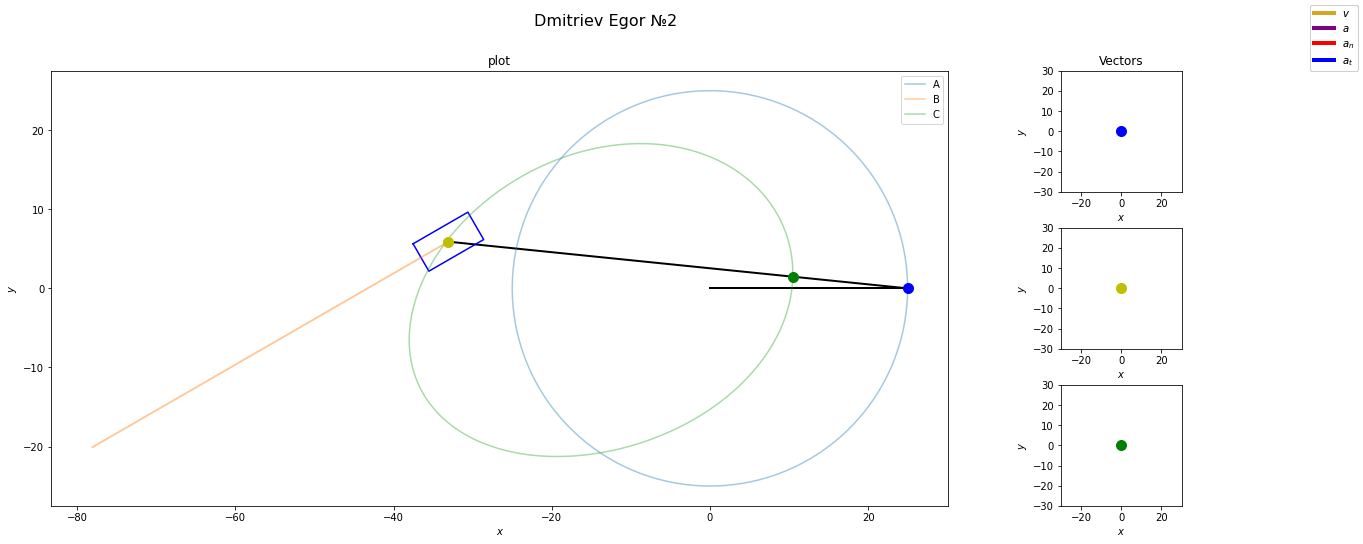

In [ ]:
%matplotlib inline

# setup the plot
grid = plt.GridSpec(3, 5, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №2", fontsize=16)
ax1 = plt.subplot(grid[:, :4], aspect='equal') 
ax2 = plt.subplot(grid[0, 4], aspect='equal') 
ax3 = plt.subplot(grid[1, 4], aspect='equal')
ax4 = plt.subplot(grid[2, 4], aspect='equal')

# setup subplot 1
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

txt_title = ax1.set_title('plot')

# setup subplot 2
ax2.set_xlim((-vs, vs))
ax2.set_ylim((-vs, vs))
ax2.plot(0, 0, 'b.', ms=20)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Vectors')

# setup subplot 3
ax3.set_xlim((-vs, vs))
ax3.set_ylim((-vs, vs))
ax3.plot(0, 0, 'y.', ms=20)

ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')

# setup subplot 4
ax4.set_xlim((-vs, vs))
ax4.set_ylim((-vs, vs))
ax4.plot(0, 0, 'g.', ms=20)

ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')

ax1.plot(*A, label='A', alpha=0.4) #use *A to unpack A to A[0] (= A_x), A[1] (= A_y)
ax1.plot(*B, label='B', alpha=0.4) #use *B to unpack B to B[0] (= B_x), B[1] (= B_y)
ax1.plot(*C, label='C', alpha=0.4) #use *C to unpack C to A[0] (= C_x), C[1] (= C_y) 

p_A, = ax1.plot(A[0][0], A[1][0], 'b.', ms=20)
p_B, = ax1.plot(B[0][0], B[1][0], 'y.', ms=20)
p_C, = ax1.plot(C[0][0], C[1][0], 'g.', ms=20)
s_OA, = ax1.plot([0, A[0][0]], [0, A[1][0]], lw=2, zorder = -10, color = 'black')
s_AB, = ax1.plot([A[0][0], B[0][0]], [A[1][0], B[1][0]], lw=2, zorder = -10, color = 'black')

box_points = np.transpose([rotMat(box_rot)@i for i in np.transpose(box_p)])
b_B, = ax1.plot(box_points[0]+B[0][0], box_points[1]+B[1][0], zorder = -5, color='b')

#draw vectors for point p
v_A = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], A, np.array([Av, Aa, Aan, Aat]),
             ['goldenrod', 'purple', 'red', 'blue'], scale = 1, ax1=ax1, ax2=ax2, scale1 = 0.2, lw1 = 0.003, lw2=0.01)
v_B = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], B, np.array([Bv, Ba, Ban, Bat]),
             ['goldenrod', 'purple', 'red', 'blue'], scale = 1, ax1=ax1, ax2=ax3, scale1 = 0.2, lw1 = 0.003, lw2=0.01)
v_C = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], C, np.array([Cv, Ca, Can, Cat]),
             ['goldenrod', 'purple', 'red', 'blue'], scale = 1, ax1=ax1, ax2=ax4, scale1 = 0.2, lw1 = 0.003)

ax1.legend()

def drawframe(n):
  p_A.set_data(A[0][n], A[1][n])
  p_B.set_data(B[0][n], B[1][n])
  p_C.set_data(C[0][n], C[1][n])
  s_OA.set_data([0, A[0][n]], [0, A[1][n]])
  s_AB.set_data([A[0][n], B[0][n]], [A[1][n], B[1][n]])
  b_B.set_data(box_points[0]+B[0][n], box_points[1]+B[1][n])
  v_A.draw(n, show=True)
  v_B.draw(n, show=True)
  v_C.draw(n, show=True)

  txt_title.set_text('Frame = {0:4d}'.format(n))
  return(*v_A.getVectors(), *v_B.getVectors(), *v_C.getVectors(), ) # return parts that have changed to redraw them only

#### Beautiful animation

In [ ]:
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(T), interval=5000/len(T), blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

# Task 3

##Given:

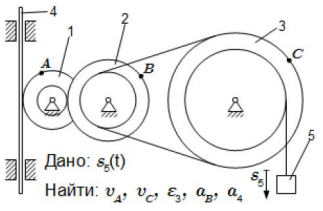

* $R_1 = 4cm;\ r_1 = 2cm$
* $R_2 = 8cm;\ r_2 = 6cm$
* $R_3 = 16cm;\ r_3 = 12cm$
* $s_5(t) = t^3 - 6t$
* $t = 2$

##Find:

1. $v_A, v_C$
1. $ε_3$
1. $a_B, a_4$

## Solution:

#### Block 3

$$v_5(t) = \dot s_5 = (t^3-6t)^\prime=3t^2-6\small{(cm/s)}
\\
\omega_3r_3=-v_5
\\
\omega_3(t) = -\frac{v_5}{r_3} = -\frac{3t^2-6}{12}=0.5-0.25t^2\small{(rad/s)}
\\
ε_3(t) = \dot \omega_3 = -0.5t \small{(rad/s^2)}
\\
\underline{ε_3(2) = -1\small{(rad/s^2)}} \text{ | Is negative because block 3 rotates in clockwise direction}
\\
v_C(t) = |\omega_3R_3|
\\
v_C(t) = |(0.5 - 0.25t^2)*16| = |8 - 4t^2|\\
\text{Took absolute value because vector's length can be positive only}
\\
\underline{v_C(2) = 8\small{(cm/s)}} \text{ | Moves clockwise}
$$

#### Block 2

$$
\omega_3R_3 = \omega_2r_2
\\
\omega_2(t) = \frac{\omega_3R_3}{r_2} = \frac{4 - 2t^2}{3} \small{(rad/s)}
\\
v_B(t) = |\omega_2R_2| = |8\omega_2|
\\
v_B(2) = |\frac{32 - 16t^2}{3}|
\\
a_B(t) = \dot v_b = |\frac{32 - 16t^2}{3}|^\prime = |\frac{-32t}{3}|
\\
a_{Bn}(2) = 21\frac{1}{3}\small{(cm/s^2)}
\\
a_{B\tau} = \omega_2^2R_2
\\
a_{B\tau}(t) = 8\left(\frac{4 - 2t^2}{3}\right)^2 \small{(cm/s^2)}
\\
a_{B\tau}(2) = \frac{128}{9} \small{(cm/s^2)}
\\
a_{B}^2 = a_{Bn}^2 + a_{B\tau}^2
\\
\underline{a_{B}(2)=\sqrt{\left(\frac{64}{3}\right)^2+\left(\frac{128}{9}\right)^2} \simeq 25.64 \small{(cm/s^2)}} \text{ | Moves clockwise}
$$


#### Block 1

$$
\omega_1*r1 = -\omega_2*R2
\\
\omega_1(t) = -\frac{32-16t^2}{3*2} = \frac{8t^2 - 16}{3} \small{(rad/s)}
\\
v_A(t) = |\omega_1*R_1| = |\frac{32t^2 - 64}{3}|
\\
\underline{v_A(2) = 21\frac{1}{3}\small{(cm/s)}} \text{ | Moves counter-clockwise}
$$

#### Block 4

$$
a_4 = \dot v_4
\\
v_4(t) = \omega_1R1 = \frac{8t^2 - 16}{3}*4  = \frac{32t^2 - 64}{3}
\\
\underline{a_4(2) = \frac{64t}{3} = 42\frac{2}{3} \small{(cm/s^2)}} \text{ | Moves downwards}
$$

### Answer:


1. $\underline{v_A(2) = 21\frac{1}{3}\small{(cm/s)}}\\
\underline{v_C(2) = 8\small{(cm/s)}}$


2. $\underline{ε_3(2) = -1\small{(rad/s^2)}}$


3. $\underline{a_{B}(2) \simeq 25.64 \small{(cm/s^2)}}\\
\underline{a_4(2) = 42\frac{2}{3} \small{(cm/s^2)}}
$

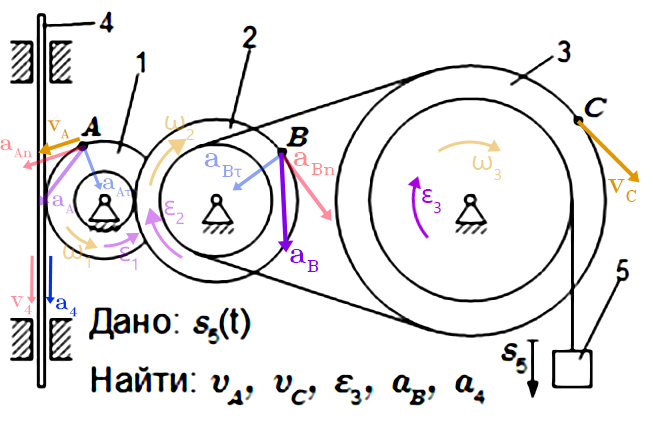